# 주요 내용
### 모델 구조 시각화 연습

In [1]:
import tensorflow as tf
tf.__version__

'2.2.0-rc2'

In [0]:
# generate model as a function

from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential

def build_model():

    sr = 16000
    duration = 1
    num_labels = 50

    model = Sequential()
    model.add(layers.Conv1D(16, 5, activation = 'relu', input_shape = (sr * duration, 1)))
    model.add(layers.MaxPooling1D(5))

    model.add(layers.Conv1D(32, 7, activation = 'relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(5))

    model.add(layers.Conv1D(64, 7, activation = 'relu'))
    model.add(layers.MaxPooling1D(5))

    model.add(layers.Conv1D(128, 7, activation = 'relu'))
    model.add(layers.Conv1D(128, 8, activation = 'relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.GlobalMaxPooling1D())

    model.add(layers.Dense(num_labels, activation = 'softmax'))

    model.compile(optimizer = 'rmsprop',
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])
    
    return model

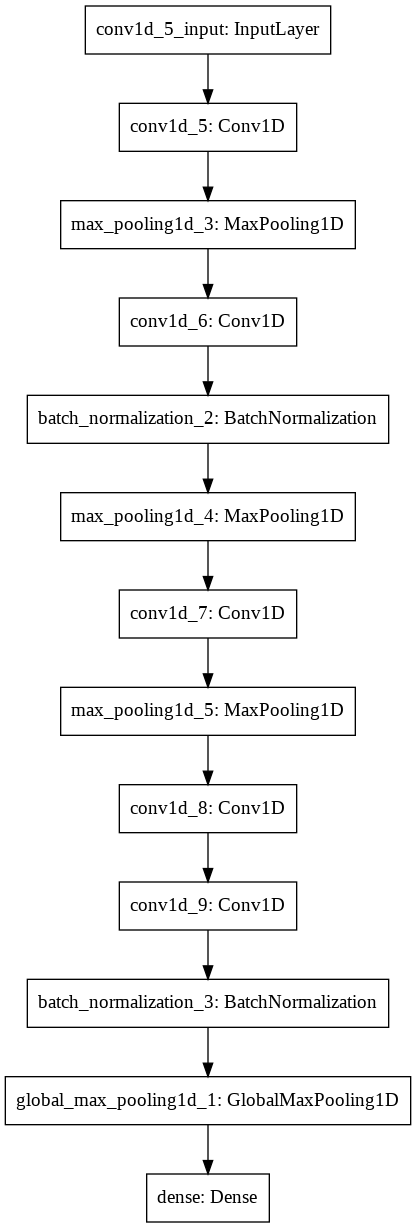

In [7]:
# plot model

from tensorflow.keras.utils import plot_model

model = build_model()

plot_model(model, to_file = 'model.png')

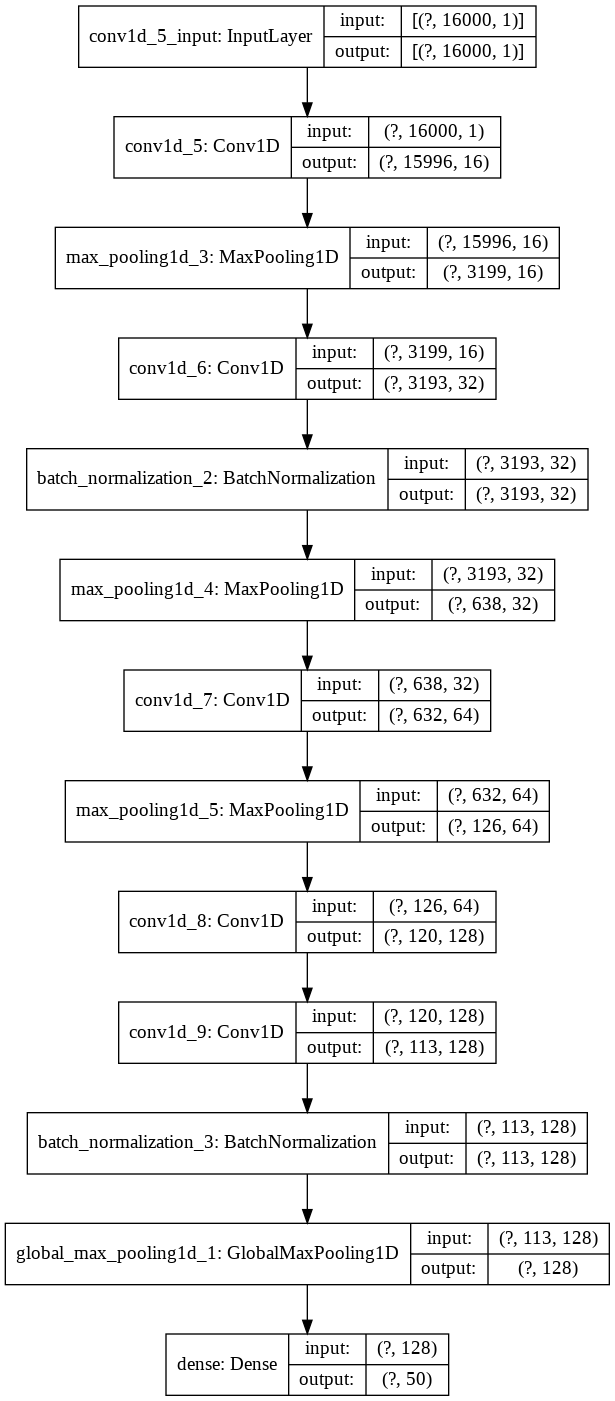

In [8]:
plot_model(model, show_shapes = True, to_file = 'model.png')